# Cleaning and Preprocessing Data for Machine Learning

In [283]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Kaggle TMDB Competition Test Data 

In [284]:
# Read the csv file into a pandas DataFrame
train = pd.read_csv('trainEFB.csv')
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/2015,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/2004,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [285]:
#Collection or not?
train['belongs_to_collection'] = train['belongs_to_collection'].notna()
#Create a Year Column
train['date'] = pd.to_datetime(train['release_date'])
train['year'] = train['date'].dt.year

#Create a Month Column
train['month'] = train['date'].dt.month

train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,date,year,month
0,1,True,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015-02-20,2015,2
1,2,True,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004-08-06,2004,8


In [286]:
new_genres = pd.DataFrame(train['genres'])
new_genres.head()

,genres
0,"[{'id': 35, 'name': 'Comedy'}]"
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,"[{'id': 18, 'name': 'Drama'}]"
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."


In [287]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d
#https://www.kaggle.com/rajuspartan/exploratory-data-analysis-with-reusable-functions
#Flatening JSON columns
new_genres.genres = new_genres.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

In [288]:
new_genres.head()

,genres
0,Comedy
1,"Comedy,Drama,Family,Romance"
2,Drama
3,"Drama,Thriller"
4,"Action,Thriller"


In [289]:
#Used this approach from Stack Overflow
#https://stackoverflow.com/questions/50394099/separate-columns-based-on-genre
#featurize the genre column
new_genres = new_genres['genres'].str.get_dummies(',')
print(new_genres)

      Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0          0          0          0       1      0            0      0       0   
1          0          0          0       1      0            0      1       1   
2          0          0          0       0      0            0      1       0   
3          0          0          0       0      0            0      1       0   
4          1          0          0       0      0            0      0       0   
5          0          1          1       0      0            0      0       1   
6          0          0          0       0      0            0      0       0   
7          0          0          0       0      0            1      0       0   
8          1          1          0       1      0            0      0       1   
9          0          0          0       1      0            0      0       0   
10         0          0          0       0      0            0      1       0   
11         0          0     

In [290]:
#add genres back to data (join)
train = pd.concat([train, new_genres], axis = 1, sort = False)
train.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,True,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,0,0,0,0
1,2,True,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,1,0,0,0,0,0
2,3,False,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,0
3,4,False,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,0,0,0,0,0,0,1,0,0
4,5,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,0,0,0,0,0,1,0,0


In [291]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'date', 'year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [292]:
#Select subset of columns
train = train[['belongs_to_collection','budget', 'original_language', 'popularity', 'status', 'year', 'month','revenue', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western']]
train.head()

,belongs_to_collection,budget,original_language,popularity,status,year,month,revenue,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,True,14000000,en,6.575393,Released,2015,2,12314651,0,0,...,0,0,0,0,0,0,0,0,0,0
1,True,40000000,en,8.248895,Released,2004,8,95149435,0,0,...,0,0,0,0,1,0,0,0,0,0
2,False,3300000,en,64.299990,Released,2014,10,13092000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,1200000,hi,3.174936,Released,2012,3,16000000,0,0,...,0,0,0,0,0,0,0,1,0,0
4,False,0,ko,1.148070,Released,2009,2,3923970,1,0,...,0,0,0,0,0,0,0,1,0,0


In [293]:
X = train[['belongs_to_collection','budget', 'original_language', 'popularity', 'status', 'year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western']]
y = train['revenue'].values.reshape(-1,1)
print(X.shape, y.shape)

(3000, 27) (3000, 1)


Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers. We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing libarary for all of these standard preprocessing techniques. Pandas also provides a `get_dummies` method that is useful to generate binary encoded data from a Data Frame. 

## Dummy Encoding (Binary Encoded Data)

Dummy Encoding transforms each categorical feature into new columns with a 1 (True) or 0 (False) encoding to represent if that categorical label was present or not in the original row. 

Pandas provides a shortcut to create Binary Encoded data.

In [294]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["belongs_to_collection", "status"])
data_binary_encoded.head()

,budget,original_language,popularity,year,month,Action,Adventure,Animation,Comedy,Crime,...,Romance,Science Fiction,TV Movie,Thriller,War,Western,belongs_to_collection_False,belongs_to_collection_True,status_Released,status_Rumored
0,14000000,en,6.575393,2015,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,40000000,en,8.248895,2004,8,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
2,3300000,en,64.299990,2014,10,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1200000,hi,3.174936,2012,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,ko,1.148070,2009,2,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [295]:
#Select subset of columns
X = data_binary_encoded[['belongs_to_collection_True', 'budget', 'original_language', 'popularity', 'status_Released', 'year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western']]
X.head()

,belongs_to_collection_True,budget,original_language,popularity,status_Released,year,month,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,14000000,en,6.575393,1,2015,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,40000000,en,8.248895,1,2004,8,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,3300000,en,64.299990,1,2014,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1200000,hi,3.174936,1,2012,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,ko,1.148070,1,2009,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Factorize to map each categorical item in a column to a value

In [296]:
X['language_enc'] = pd.factorize(X['original_language'])[0]
X.head()

,belongs_to_collection_True,budget,original_language,popularity,status_Released,year,month,Action,Adventure,Animation,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,language_enc
0,1,14000000,en,6.575393,1,2015,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,40000000,en,8.248895,1,2004,8,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,3300000,en,64.299990,1,2014,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1200000,hi,3.174936,1,2012,3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,ko,1.148070,1,2009,2,1,0,0,...,0,0,0,0,0,0,1,0,0,2


In [297]:
#This is just a list of all of the languages listed
catenc = pd.factorize(X['original_language'])
catenc


(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Index(['en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta', 'cn',
        'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da', 'fi', 'el',
        'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu', 'ml', 'bn', 'id'],
       dtype='object'))

In [298]:
#Select subset of columns
X = X[['belongs_to_collection_True', 'budget', 'language_enc', 'popularity', 'status_Released', 'year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western']]
X.head()

,belongs_to_collection_True,budget,language_enc,popularity,status_Released,year,month,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,14000000,0,6.575393,1,2015,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,40000000,0,8.248895,1,2004,8,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,3300000,0,64.299990,1,2014,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1200000,1,3.174936,1,2012,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,2,1.148070,1,2009,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Can we predict the film revenue from this dataset?

In [299]:
X.head()

,belongs_to_collection_True,budget,language_enc,popularity,status_Released,year,month,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,14000000,0,6.575393,1,2015,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,40000000,0,8.248895,1,2004,8,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,3300000,0,64.299990,1,2014,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1200000,1,3.174936,1,2012,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,2,1.148070,1,2009,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [300]:
print(X.shape, y.shape)

(3000, 27) (3000, 1)


In [301]:
# Use train_test_split to create training and testing data from our "train" dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# LINEAR REGRESSION

In [302]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [303]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6614745691484896
Testing Score: 0.6067113036022215


Text(0.5,1,'Residual Plot')

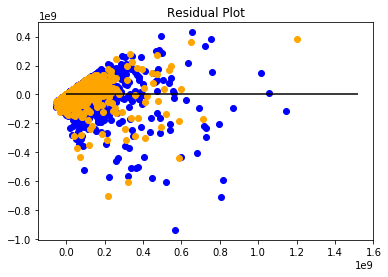

In [304]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [305]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [306]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

In [307]:
# Create a LinearRegression model and fit it to the scaled training data
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

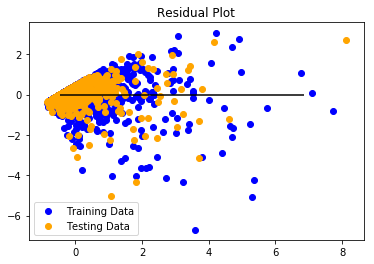

In [308]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model2.predict(X_test_scaled)
plt.scatter(model2.predict(X_train_scaled), model2.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(predictions, predictions - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [309]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model2.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3369029261477321, R2: 0.60671130360222


# Ridge Model

In [310]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.33690235824417913, R2: 0.6067119665529713


# ElasticNet model

In [311]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3336799072180326, R2: 0.6104737432100347
